## BITCOIN PREDICTION USING MACHINE LEARNING

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [3]:

data = pd.read_csv('dataset.csv')
print(data.head())

        Date        Open        High         Low       Close   Adj Close  \
0  9/17/2014  465.864014  468.174011  452.421997  457.334015  457.334015   
1  9/18/2014  456.859985  456.859985  413.104004  424.440002  424.440002   
2  9/19/2014  424.102997  427.834991  384.532013  394.795990  394.795990   
3  9/20/2014  394.673004  423.295990  389.882996  408.903992  408.903992   
4  9/21/2014  408.084991         NaN  393.181000  398.821014         NaN   

       Volume  
0  21056800.0  
1  34483200.0  
2  37919700.0  
3  36863600.0  
4  26580100.0  


In [4]:
data.shape


(2713, 7)

In [5]:
# Check for null values
print(data.isnull().sum())

Date         0
Open         1
High         1
Low          1
Close        2
Adj Close    1
Volume       2
dtype: int64


In [6]:
# Replace missing values with the mean for numerical columns
data['Open'] = data['Open'].fillna(data['Open'].mean())
data['High'] = data['High'].fillna(data['High'].mean())
data['Low'] = data['Low'].fillna(data['Low'].mean())
data['Volume'] = data['Volume'].fillna(data['Volume'].mean())
data['Adj Close']=data['Adj Close'].fillna(data['Adj Close'].mean())
data['Close'] = data['Close'].fillna(data['Close'].mean())

In [7]:
# Check for null values
print(data.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [8]:
# Define the features (X) and target variable (y)
X = data[['Open', 'High', 'Low', 'Volume']]  # Example features
y = data['Close']  # Target variable


In [9]:
#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:

# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
# Initialize and train the KNN regressor
knn_model = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors
knn_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test_scaled)

In [15]:
# Evaluate the model
mse_train = mean_squared_error(y_train, knn_model.predict(X_train_scaled))
mse_test = mean_squared_error(y_test, y_pred_knn)

print(f"Mean Squared Error (Train): {mse_train}")
print(f"Mean Squared Error (Test): {mse_test}")

Mean Squared Error (Train): 385451.3058124301
Mean Squared Error (Test): 447467.807782621


In [16]:
r2_train = r2_score(y_train, knn_model.predict(X_train_scaled))
r2_test = r2_score(y_test, y_pred_knn)

print(f"R-squared (Train): {r2_train}")
print(f"R-squared (Test): {r2_test}")

R-squared (Train): 0.9985374464963526
R-squared (Test): 0.9982059418978396


In [17]:
# Initialize and train the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=24)  # You can adjust hyperparameters
gb_model.fit(X_train_scaled, y_train)

# Make predictions on the training and test sets
y_pred_train_gb = gb_model.predict(X_train_scaled)
y_pred_test_gb = gb_model.predict(X_test_scaled)

# Evaluate the model
mse_train_gb = mean_squared_error(y_train, y_pred_train_gb)
mse_test_gb = mean_squared_error(y_test, y_pred_test_gb)
r2_train_gb = r2_score(y_train, y_pred_train_gb)
r2_test_gb = r2_score(y_test, y_pred_test_gb)

print(f"Gradient Boosting MSE (Train): {mse_train_gb}")
print(f"Gradient Boosting MSE (Test): {mse_test_gb}")
print(f"Gradient Boosting R-squared (Train): {r2_train_gb}")
print(f"Gradient Boosting R-squared (Test): {r2_test_gb}")

Gradient Boosting MSE (Train): 102294.50067406289
Gradient Boosting MSE (Test): 193763.6806426674
Gradient Boosting R-squared (Train): 0.9996118545245309
Gradient Boosting R-squared (Test): 0.9992231322675836


In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

threshold = np.mean(y_test)
y_pred_knn_classes = (y_pred_knn >= threshold).astype(int)
y_test_classes = (y_test >= threshold).astype(int)

# Calculate classification metrics.
accuracy = accuracy_score(y_test_classes, y_pred_knn_classes)
precision = precision_score(y_test_classes, y_pred_knn_classes)
recall = recall_score(y_test_classes, y_pred_knn_classes)
f1 = f1_score(y_test_classes, y_pred_knn_classes)

print(f"KNN Accuracy: {accuracy}")
print(f"KNN Precision: {precision}")
print(f"KNN Recall: {recall}")
print(f"KNN F1-score: {f1}")

KNN Accuracy: 0.9938574938574939
KNN Precision: 0.9837837837837838
KNN Recall: 0.9891304347826086
KNN F1-score: 0.986449864498645


In [19]:
threshold = np.mean(y_test)
y_pred_gb_classes = (y_pred_test_gb >= threshold).astype(int)
y_test_classes = (y_test >= threshold).astype(int)

# Calculate classification metrics for Gradient Boosting.
accuracy_gb = accuracy_score(y_test_classes, y_pred_gb_classes)
precision_gb = precision_score(y_test_classes, y_pred_gb_classes)
recall_gb = recall_score(y_test_classes, y_pred_gb_classes)
f1_gb = f1_score(y_test_classes, y_pred_gb_classes)

print(f"Gradient Boosting Accuracy: {accuracy_gb}")
print(f"Gradient Boosting Precision: {precision_gb}")
print(f"Gradient Boosting Recall: {recall_gb}")
print(f"Gradient Boosting F1-score: {f1_gb}")

Gradient Boosting Accuracy: 0.9963144963144963
Gradient Boosting Precision: 0.983957219251337
Gradient Boosting Recall: 1.0
Gradient Boosting F1-score: 0.9919137466307277


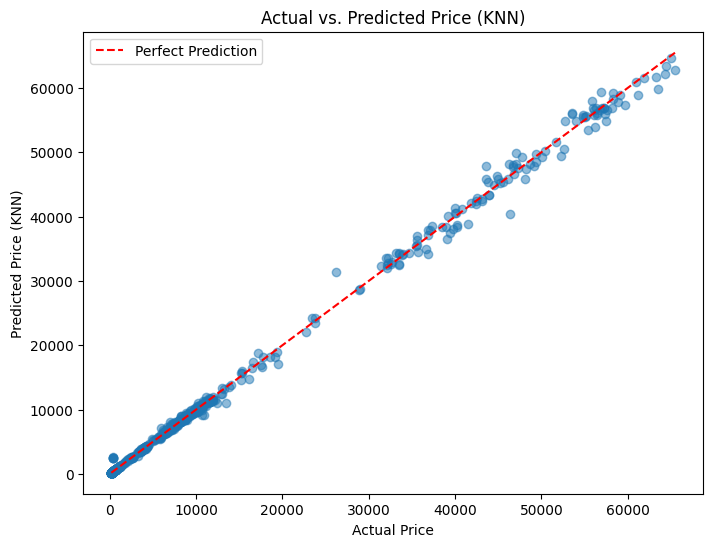

In [20]:
import matplotlib.pyplot as plt

# Create a scatter plot of actual vs. predicted prices for KNN
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_knn, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price (KNN)")
plt.title("Actual vs. Predicted Price (KNN)")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.legend()
plt.show()


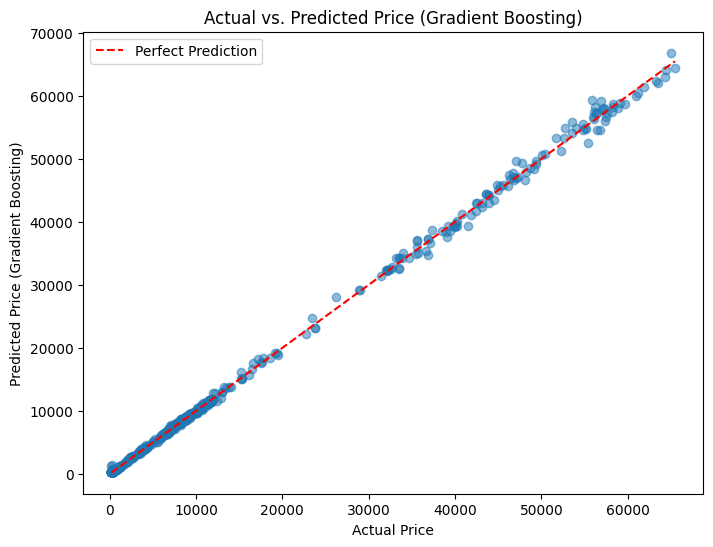

In [21]:
# Create a scatter plot of actual vs. predicted prices for Gradient Boosting
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test_gb, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price (Gradient Boosting)")
plt.title("Actual vs. Predicted Price (Gradient Boosting)")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.legend()
plt.show()

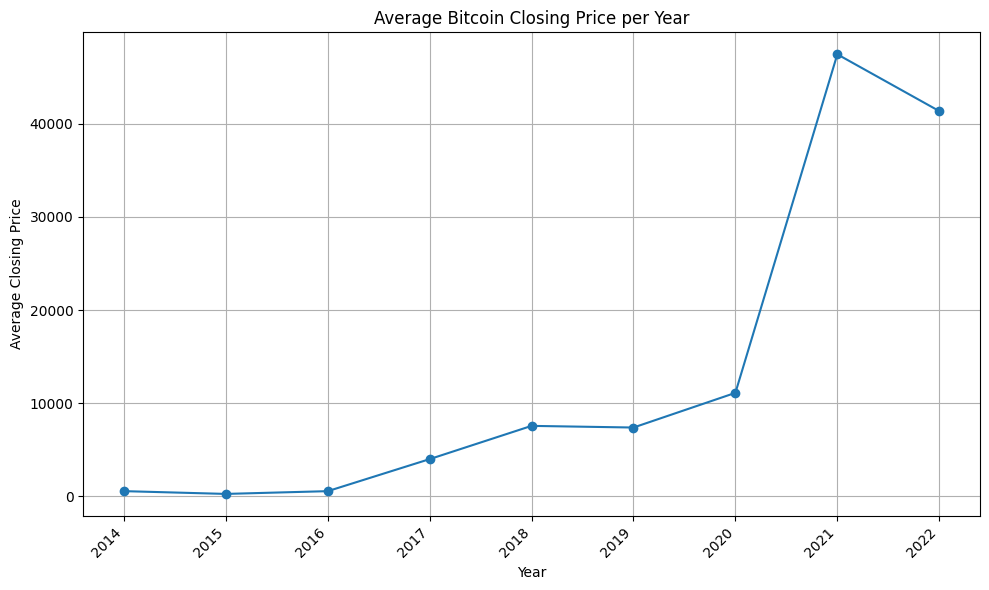

In [22]:
import matplotlib.pyplot as plt

# Assuming 'data' DataFrame is already loaded and processed as in the previous code.

# Convert 'Date' column to datetime objects if it's not already.
data['Date'] = pd.to_datetime(data['Date'])

# Extract year from the 'Date' column
data['Year'] = data['Date'].dt.year

# Group data by year and calculate the mean closing price for each year.
yearly_price = data.groupby('Year')['Close'].mean()


# Create the plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.plot(yearly_price.index, yearly_price.values, marker='o')  # Use marker='o' for data points
plt.xlabel('Year')
plt.ylabel('Average Closing Price')
plt.title('Average Bitcoin Closing Price per Year')
plt.grid(True)
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

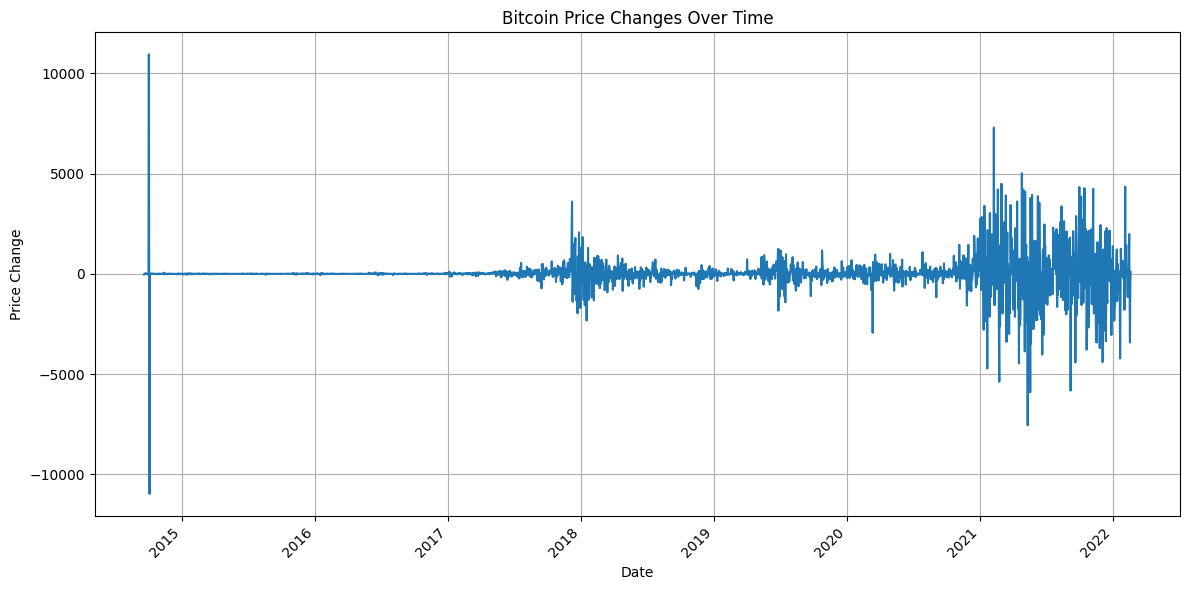

In [23]:
# Convert 'Date' column to datetime objects if it's not already.
data['Date'] = pd.to_datetime(data['Date'])

# Calculate the daily price changes
data['Price Change'] = data['Close'].diff()

# Plotting the price changes over time
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Price Change'])
plt.xlabel('Date')
plt.ylabel('Price Change')
plt.title('Bitcoin Price Changes Over Time')
plt.grid(True)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

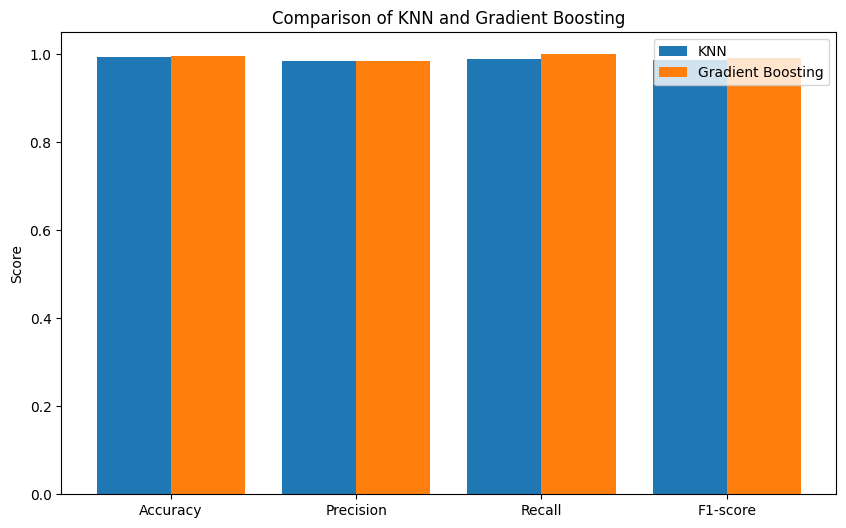

In [24]:
import matplotlib.pyplot as plt

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
knn_scores = [accuracy, precision, recall, f1]
gb_scores = [accuracy_gb, precision_gb, recall_gb, f1_gb]

x = range(len(metrics))

plt.figure(figsize=(10, 6))
plt.bar(x, knn_scores, width=0.4, label='KNN', align='center')
plt.bar([i + 0.4 for i in x], gb_scores, width=0.4, label='Gradient Boosting', align='center')
plt.xticks([i + 0.2 for i in x], metrics)
plt.ylabel('Score')
plt.title('Comparison of KNN and Gradient Boosting')
plt.legend()
plt.show()

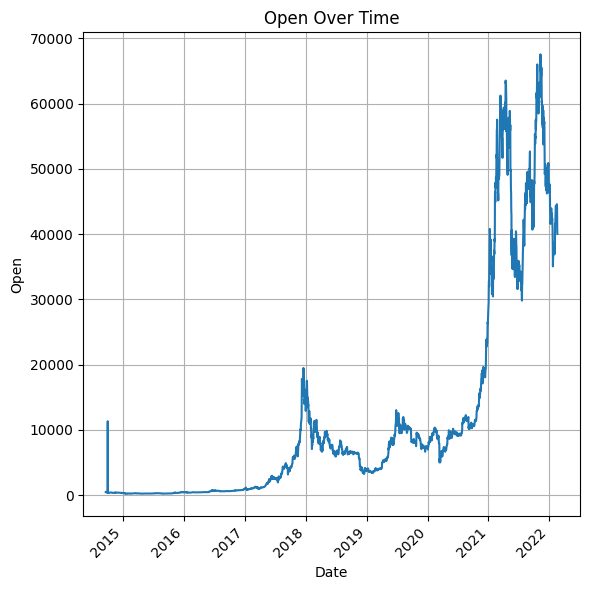

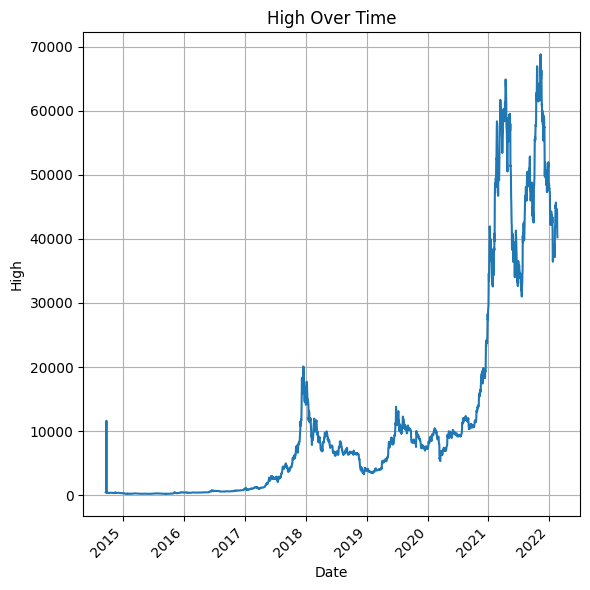

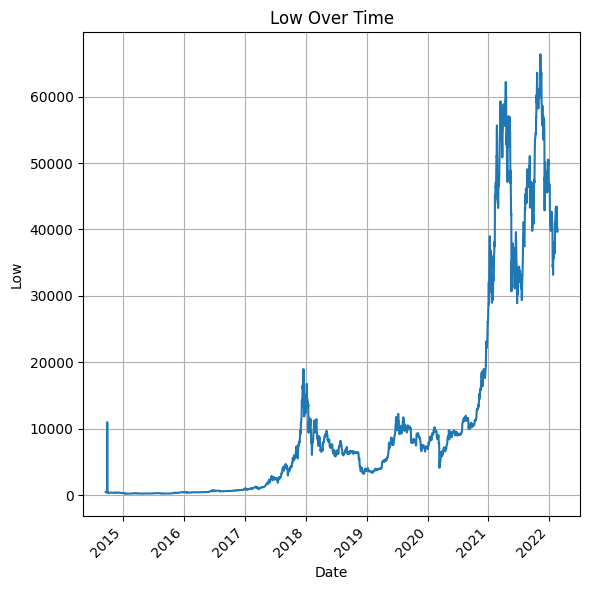

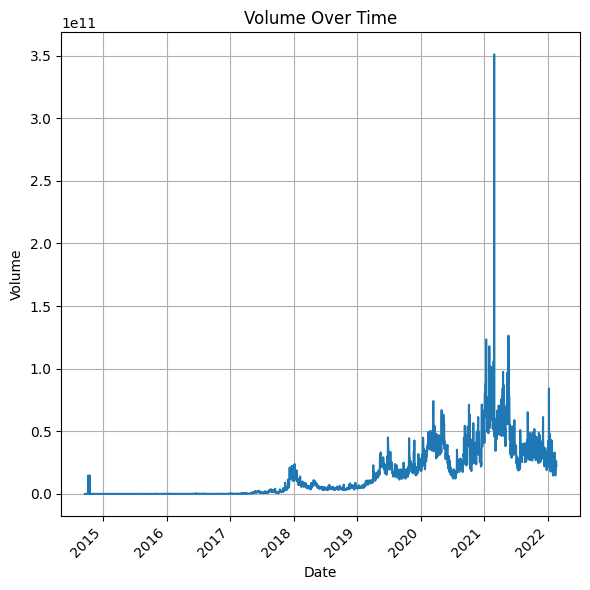

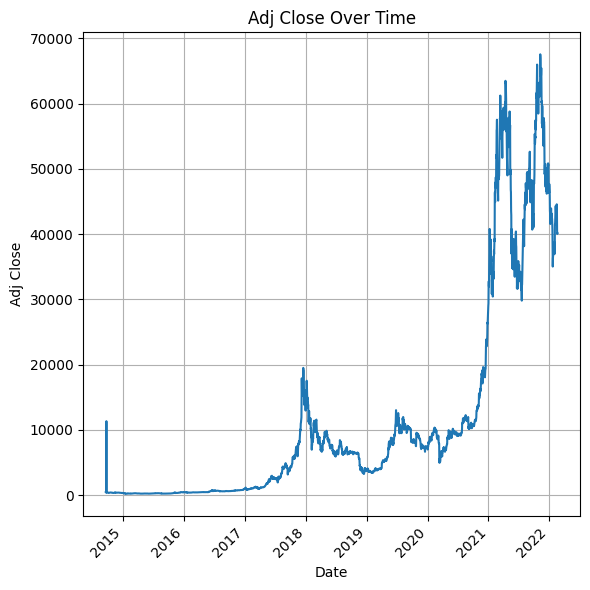

In [40]:
# Assuming 'data' DataFrame is already loaded and processed as in the previous code.
for col in ['Open', 'High', 'Low', 'Volume', 'Adj Close']:
    plt.figure(figsize=(6,6))
    plt.plot(data['Date'], data[col])
    plt.xlabel('Date')
    plt.ylabel(col)
    plt.title(f'{col} Over Time')
    plt.grid(True)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

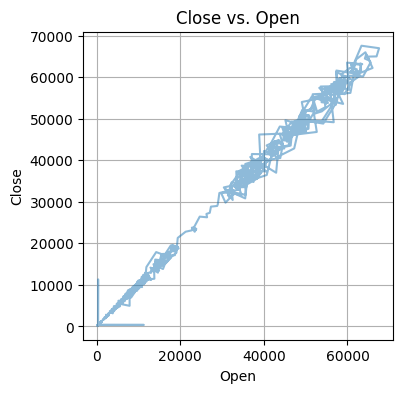

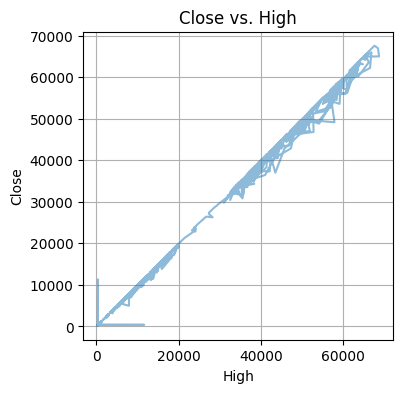

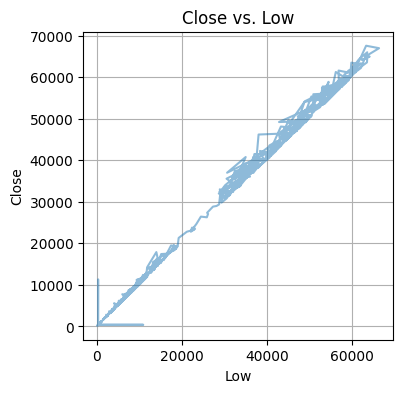

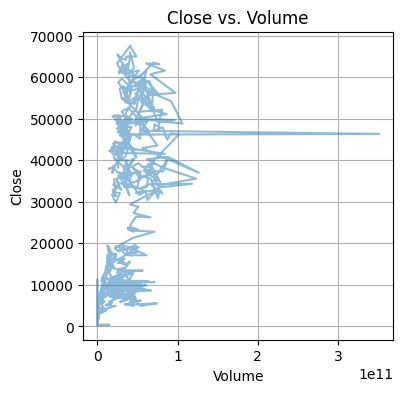

In [29]:
# Assuming 'X' contains your features (Open, High, Low, Volume) and 'y' is your target variable (Close)

for col in X.columns:
    plt.figure(figsize=(4, 4))
    plt.plot(X[col], y, alpha=0.5)  # Create a scatter plot for each feature vs. target variable
    plt.xlabel(col)
    plt.ylabel("Close")
    plt.title(f"Close vs. {col}")
    plt.grid(True)
    plt.show()

In [ ]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor


# Initialize KNN regressor
knn = KNeighborsRegressor()

# Define parameter grid for KNN
param_grid = {'n_neighbors': range(1, 11)}  # Try values of K from 1 to 10

# Use GridSearchCV to find the best K
grid_search = GridSearchCV(knn, param_grid, scoring='neg_mean_squared_error', cv=5)  # Corrected line
grid_search.fit(X_train, y_train)

# Output the best K and the corresponding MSE values
print(f"Best K (number of neighbors): {grid_search.best_params_['n_neighbors']}")

Best K (number of neighbors): 10


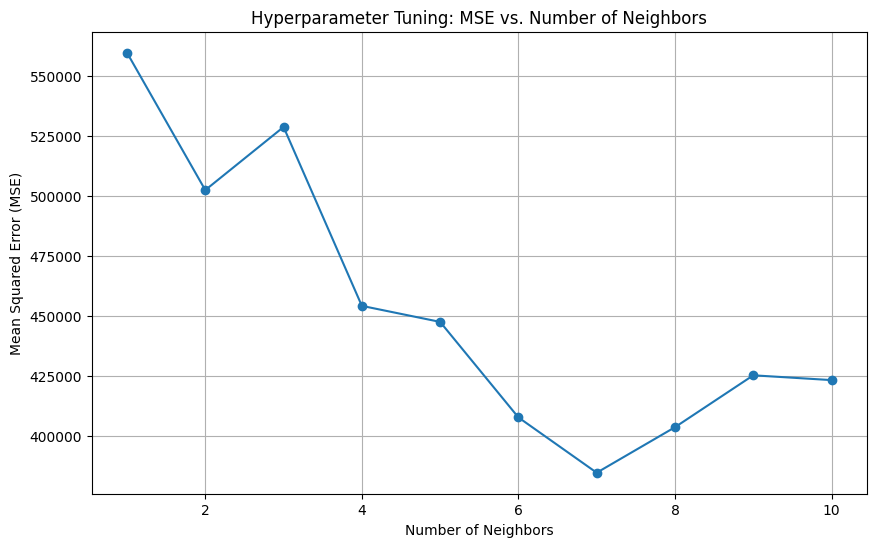

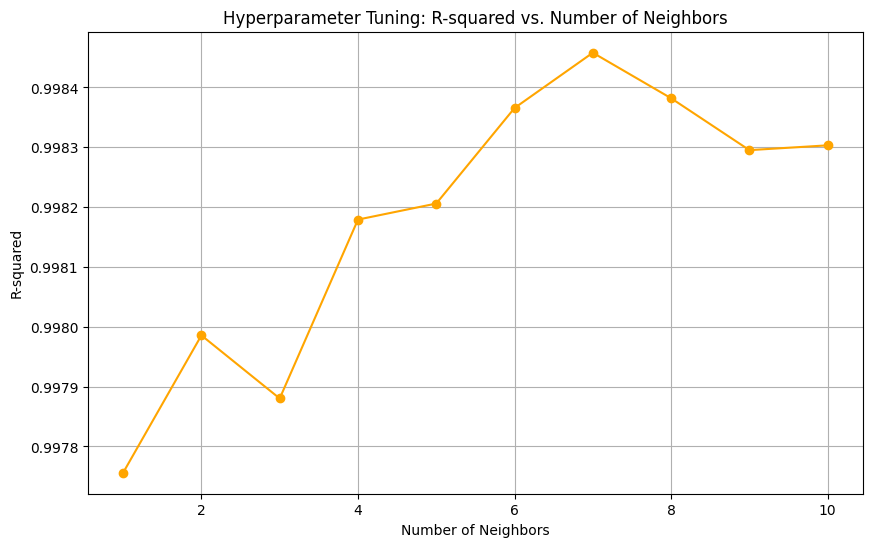

In [30]:
# Assuming X_train_scaled, y_train, and a range of n_neighbors values are available.

mse_values = []
r2_values = []
n_neighbors_values = list(range(1, 11))  # Test n_neighbors from 1 to 30

for n_neighbors in n_neighbors_values:
    knn_model = KNeighborsRegressor(n_neighbors=n_neighbors)
    knn_model.fit(X_train_scaled, y_train)
    y_pred = knn_model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mse_values.append(mse)
    r2_values.append(r2)

# Plot MSE values
plt.figure(figsize=(10, 6))
plt.plot(n_neighbors_values, mse_values, marker='o')
plt.xlabel("Number of Neighbors")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Hyperparameter Tuning: MSE vs. Number of Neighbors")
plt.grid(True)
plt.show()

# Plot R-squared values
plt.figure(figsize=(10, 6))
plt.plot(n_neighbors_values, r2_values, marker='o', color='orange')
plt.xlabel("Number of Neighbors")
plt.ylabel("R-squared")
plt.title("Hyperparameter Tuning: R-squared vs. Number of Neighbors")
plt.grid(True)
plt.show()

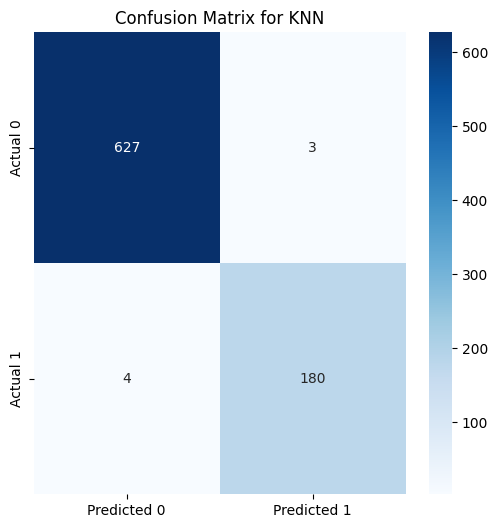

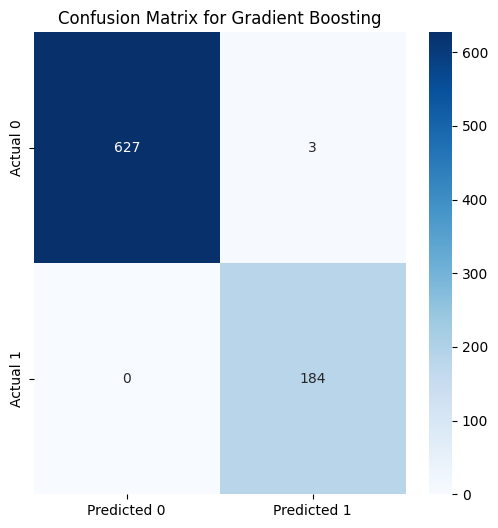

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming y_test_classes and y_pred_knn_classes are defined as in your code.
cm_knn = confusion_matrix(y_test_classes, y_pred_knn_classes)

plt.figure(figsize=(6, 6))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title("Confusion Matrix for KNN")
plt.show()

# Assuming y_test_classes and y_pred_gb_classes are defined as in your code.
cm_gb = confusion_matrix(y_test_classes, y_pred_gb_classes)

plt.figure(figsize=(6, 6))
sns.heatmap(cm_gb, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title("Confusion Matrix for Gradient Boosting")
plt.show()

In [31]:
# prompt: comparision of mse and r2 values for knn and gradient

# Assuming mse_test, r2_test, mse_test_gb, and r2_test_gb are already defined.

print("KNN Model:")
print(f"Mean Squared Error (Test): {mse_test}")
print(f"R-squared (Test): {r2_test}")

print("\nGradient Boosting Model:")
print(f"Mean Squared Error (Test): {mse_test_gb}")
print(f"R-squared (Test): {r2_test_gb}")

# Compare MSE
if mse_test < mse_test_gb:
    print("\nKNN has a lower MSE, indicating potentially better performance.")
else:
    print("\nGradient Boosting has a lower MSE, indicating potentially better performance.")

# Compare R-squared
if r2_test > r2_test_gb:
    print("KNN has a higher R-squared, indicating a better fit to the data.")
else:
    print("Gradient Boosting has a higher R-squared, indicating a better fit to the data.")

KNN Model:
Mean Squared Error (Test): 447467.807782621
R-squared (Test): 0.9982059418978396

Gradient Boosting Model:
Mean Squared Error (Test): 193763.6806426674
R-squared (Test): 0.9992231322675836

Gradient Boosting has a lower MSE, indicating potentially better performance.
Gradient Boosting has a higher R-squared, indicating a better fit to the data.


In [32]:
import pickle

# Save the trained Gradient Boosting model to a file
with open('gb_model.pkl', 'wb') as file:
    pickle.dump(gb_model, file)

In [33]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Load the trained model (replace 'gb_model.pkl' with the actual file name)
# Assuming you've saved the trained model using pickle or joblib
import joblib
import os # Import the os module

# Instead of loading from a file, you can use the trained model directly
loaded_model = gb_model  # 'gb_model' is already in your environment

# Similarly, for the scaler:
# scaler = joblib.load(scaler_path)  # Commented out as we're not loading from file
# If 'scaler' is not a MinMaxScaler instance, create one:
if not isinstance(scaler, MinMaxScaler):
    scaler = MinMaxScaler()
    # You may need to fit the scaler using your training data here if it's new
    # scaler.fit(your_training_data)

# Get user input for features
open_price = float(input("Enter the opening price: "))
high_price = float(input("Enter the highest price: "))
low_price = float(input("Enter the lowest price: "))
volume = float(input("Enter the volume: "))

# Create a NumPy array from the user input
user_input = np.array([[open_price, high_price, low_price, volume]])

# Scale the user input using the same scaler used for training
user_input_scaled = scaler.transform(user_input)

# Make a prediction using the loaded model
predicted_price = loaded_model.predict(user_input_scaled)

print(f"Predicted closing price: {predicted_price[0]}")

Enter the opening price: 234.5
Enter the highest price: 4500
Enter the lowest price: 12
Enter the volume: 2345
Predicted closing price: 1714.3208149314646


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
